# Algoritmo de Deutsch

O algoritmo de Deutsch resolve o problema da paridade para o caso especial em que $n = 1.$  
No contexto da computação quântica, esse problema às vezes é chamado de *problema de Deutsch*, e seguiremos essa nomenclatura nesta aula.

Para ser preciso, a entrada é representada por uma função $f:\Sigma \rightarrow \Sigma$ de um bit para um bit.  
Existem quatro funções desse tipo:

$$
\rule[-10mm]{0mm}{10mm}
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

A primeira e a última dessas funções são *constantes* e as duas do meio são *balanceadas*, o que significa que os dois valores de saída possíveis da função ocorrem o mesmo número de vezes ao variarmos as entradas.  
O problema de Deutsch é determinar a qual dessas duas categorias a função de entrada pertence: constante ou balanceada.

<Figure title="Problema de Deutsch">
  Entrada: uma função $f:\{0,1\}\rightarrow\{0,1\}$
</Figure>

<Figure title="Problema de Deutsch">
  Saída: $0$ se $f$ for constante, $1$ se $f$ for balanceada
</Figure>


Se considerarmos a função de entrada $f$ no problema de Deutsch como representando acesso aleatório a uma string, estamos pensando em uma string de dois bits: $f(0)f(1).$

$$
\begin{array}{cc}
\mathsf{função} & \mathsf{string}\\
\hline
f_1 & 00 \\
f_2 & 01 \\
f_3 & 10 \\
f_4 & 11
\end{array}
$$

Visto dessa forma, o problema de Deutsch é calcular a paridade (ou, de forma equivalente, o OU-exclusivo) dos dois bits.

Todo algoritmo clássico de consulta que resolva corretamente esse problema deve consultar ambos os bits: $f(0)$ e $f(1).$  
Se descobrirmos que $f(1) = 1,$ por exemplo, a resposta ainda pode ser $0$ ou $1,$ dependendo se $f(0) = 1$ ou $f(0) = 0,$ respectivamente.  
Todos os outros casos são semelhantes; conhecer apenas um dos dois bits não fornece informação alguma sobre a paridade deles.  
Portanto, o circuito booleano descrito na seção anterior é o melhor que podemos fazer em termos de número de consultas necessárias para resolver esse problema.

## Descrição do circuito quântico

O algoritmo de Deutsch resolve o problema de Deutsch usando uma única consulta, fornecendo assim uma vantagem quantificável do quântico sobre o clássico.  
Essa pode ser uma vantagem modesta — uma consulta em vez de duas.

Aqui está um circuito quântico que descreve o algoritmo de Deutsch:

![Algoritmo de Deutsch](https://upload.wikimedia.org/wikipedia/commons/8/8a/Deutsch_algorithm_circuit.svg)


Para analisar o algoritmo de Deutsch, acompanharemos a ação do circuito acima e identificaremos os estados dos qubits nos momentos sugeridos pela figura.


O estado inicial ($\vert a\rangle$) é $\vert 1\rangle \vert 0 \rangle,$ e as duas operações de Hadamard no lado esquerdo do circuito transformam esse estado em

$$
\vert b \rangle = \vert - \rangle \vert + \rangle
= \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 0\rangle
+ \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 1\rangle.
$$

(Como sempre, seguimos a convenção de ordenação de qubits do Qiskit, que coloca o qubit superior à direita e o inferior à esquerda.)

Em seguida, a porta unitária $U_f$ é aplicada.  
De acordo com a definição da porta $U_f$, o valor da função $f$ para o estado clássico do qubit superior/direito é aplicado com XOR no qubit inferior/esquerdo, o que transforma $\vert \pi_1\rangle$ no estado

$$
\vert c \rangle
= \frac{1}{2} \bigl( \vert 0 \oplus f(0) \rangle - \vert 1 \oplus f(0) \rangle \bigr) \vert 0 \rangle
+ \frac{1}{2} \bigl( \vert 0 \oplus f(1) \rangle - \vert 1 \oplus f(1) \rangle \bigr) \vert 1 \rangle.
$$

Podemos simplificar essa expressão observando que a fórmula

$$
\vert 0 \oplus a\rangle - \vert 1 \oplus a\rangle = (-1)^a \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
$$

funciona para ambos os valores possíveis $a\in\Sigma.$  
Mais explicitamente, os dois casos são os seguintes:

$$
\begin{aligned}
\vert 0 \oplus 0\rangle - \vert 1 \oplus 0\rangle
& = \vert 0 \rangle - \vert 1 \rangle
= (-1)^0 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)\\
\vert 0 \oplus 1\rangle - \vert 1 \oplus 1\rangle & = \vert 1 \rangle - \vert 0\rangle
= (-1)^1 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
\end{aligned}
$$

Assim, podemos expressar $\vert c \rangle$ da seguinte forma:

$$
\begin{aligned}
  \vert c \rangle
  & = \frac{1}{2} (-1)^{f(0)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 0 \rangle
  + \frac{1}{2} (-1)^{f(1)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 1 \rangle \\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$

Algo interessante acabou de acontecer!  
Embora a ação da porta $U_f$ sobre estados da base padrão deixe o qubit superior/direito inalterado e aplique o valor da função no qubit inferior/esquerdo, aqui vemos que o estado do qubit superior/direito mudou (em geral), enquanto o estado do qubit inferior/esquerdo permaneceu o mesmo — especificamente no estado $\vert - \rangle$ antes e depois da aplicação da porta $U_f$.  
Esse fenômeno é conhecido como *phase kickback* (retrocesso de fase), e falaremos mais sobre ele em breve.

Com uma última simplificação — que é extrair o fator $(-1)^{f(0)}$ da soma — obtemos esta expressão do estado $\vert c \rangle$:

$$
\begin{aligned}
  \vert c \rangle
  & = (-1)^{f(0)} \vert - \rangle
      \biggl( \frac{\vert 0\rangle + (-1)^{f(0) \oplus f(1)} \vert 1\rangle}{\sqrt{2}}\biggr) \\
  & = \begin{cases}
        (-1)^{f(0)} \vert - \rangle \vert + \rangle & \text{se $f(0) \oplus f(1) = 0$}\\[1mm]
        (-1)^{f(0)} \vert - \rangle \vert - \rangle & \text{se $f(0) \oplus f(1) = 1$}.
      \end{cases}
\end{aligned}
$$

Note que, nessa expressão, temos $f(0) \oplus f(1)$ no expoente de $-1$ em vez de $f(1) - f(0),$ que seria o esperado de um ponto de vista puramente algébrico, mas obtemos o mesmo resultado de qualquer forma.  
Isso ocorre porque o valor $(-1)^k$ para qualquer inteiro $k$ depende apenas de $k$ ser par ou ímpar.

Aplicando o portão Hadamard final ao qubit superior, ficamos com o estado

$$
\vert d \rangle =
\begin{cases}
  (-1)^{f(0)} \vert - \rangle \vert 0 \rangle & \text{se $f(0) \oplus f(1) = 0$}\\[1mm]
  (-1)^{f(0)} \vert - \rangle \vert 1 \rangle & \text{se $f(0) \oplus f(1) = 1$},
\end{cases}
$$

o que leva ao resultado correto com probabilidade $1$ quando o qubit direito/superior é medido.

## Observações adicionais sobre o phase kickback

Antes de prosseguir, vamos analisar novamente o raciocínio acima sob um ângulo ligeiramente diferente que pode esclarecer o fenômeno do *phase kickback*.

Primeiro, observe que a fórmula a seguir funciona para todas as escolhas de bits $b,c\in\Sigma.$

$$
\vert b \oplus c\rangle = X^c \vert b \rangle
$$

Isso pode ser verificado testando para os dois valores possíveis $c = 0$ e $c = 1$:

$$
\begin{aligned}
\vert b \oplus 0 \rangle & = \vert b\rangle = \mathbb{I} \vert b \rangle = X^0 \vert b \rangle\\
\vert b \oplus 1 \rangle & = \vert \neg b\rangle = X \vert b \rangle = X^1 \vert b \rangle.
\end{aligned}
$$

Usando essa fórmula, vemos que

$$
U_f \bigl(\vert b\rangle \vert a \rangle\bigr)
= \vert b \oplus f(a) \rangle \vert a \rangle
= \bigl(X^{f(a)}\vert b \rangle\bigr) \vert a \rangle
$$

para toda escolha de bits $a,b\in\Sigma.$  
Como essa fórmula é válida para $b=0$ e $b=1,$ vemos pela linearidade que

$$
U_f \bigl( \vert \psi \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)}\vert \psi \rangle\bigr) \vert a \rangle
$$

para todo vetor de estado de qubit $\vert \psi\rangle,$ e, portanto,

$$
U_f \bigl( \vert - \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)} \vert - \rangle \bigr) \vert a \rangle
= (-1)^{f(a)} \vert - \rangle \vert a \rangle.
$$

A chave que faz isso funcionar é que $X\vert - \rangle = - \vert - \rangle.$  
Em termos matemáticos, o vetor $\vert - \rangle$ é um *autovetor* da matriz $X$ com *autovalor* $-1.$

Discutiremos autovetores e autovalores em mais detalhes na próxima lição sobre *Estimativa de fase e fatoração*, onde o fenômeno de *phase kickback* é generalizado para outras operações unitárias.

Tendo em mente que escalares flutuam livremente através de produtos tensoriais, encontramos uma maneira alternativa de raciocinar como a operação $U_f$ transforma $\vert b \rangle$ em $\vert  c \rangle$ na análise acima:

$$
\begin{aligned}
  \vert c \rangle
  & = U_f \bigl( \vert - \rangle \vert + \rangle \bigr)\\
  & = \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 0\rangle \bigr)
    + \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 1\rangle \bigr)\\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$


Baseado no material da © IBM Corp., 2017-2025

In [1]:
%%capture
!pip install qiskit qiskit-aer qiskit_ibm_runtime

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer, AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from typing import Optional

In [3]:
backend = FakeTorino()
sampler = Sampler(backend)

In [4]:
def deutsch_algorithm(oracle: Optional[QuantumCircuit] = None) -> QuantumCircuit:
    circuit = QuantumCircuit(2, 1)

    circuit.x(1)
    circuit.h([0, 1])

    circuit.barrier()
    if oracle:
        circuit = circuit.compose(oracle)
    circuit.barrier()

    circuit.h(0)
    circuit.measure(0, 0)

    return circuit

In [5]:
def constant_0():
    circuit = QuantumCircuit(2, 1)
    return circuit

def constant_1():
    circuit = QuantumCircuit(2, 1)
    circuit.x(1)
    return circuit


In [6]:
def balanced_x():
    circuit = QuantumCircuit(2, 1)
    circuit.cx(0, 1)
    return circuit

def balanced_not_x():
    circuit = QuantumCircuit(2, 1)
    circuit.cx(0, 1)
    circuit.x(1)
    return circuit


In [7]:
for f in [
    constant_0,
    constant_1,
    balanced_x,
    balanced_not_x
]:
    qc = deutsch_algorithm(f())
    result = AerSimulator().run(qc, shots=100).result()
    counts = result.get_counts()
    print(f.__name__, counts)


constant_0 {'0': 100}
constant_1 {'0': 100}
balanced_x {'1': 100}
balanced_not_x {'1': 100}


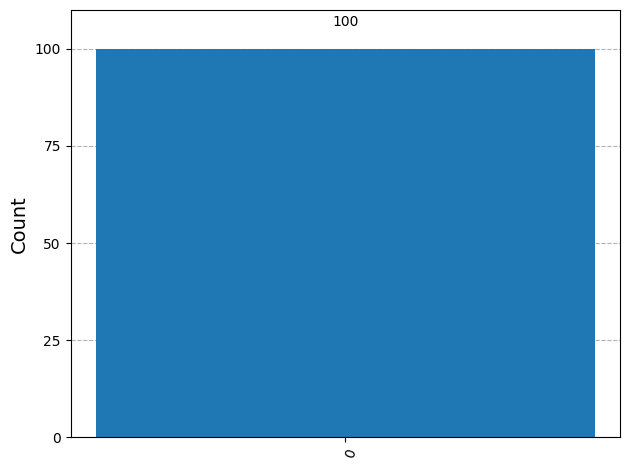

In [8]:
qc = deutsch_algorithm(constant_0())
qc_transpiled = transpile(qc, backend, optimization_level=2)
qc_job = sampler.run([qc_transpiled], shots=100)
plot_histogram(qc_job.result()[0].data.c.get_counts())

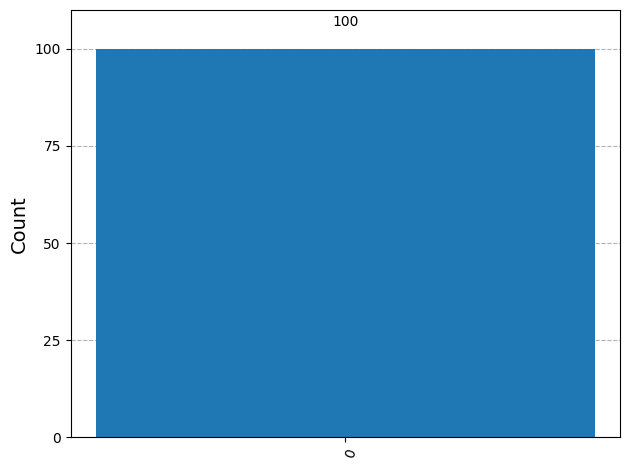

In [9]:
qc = deutsch_algorithm(constant_1())
qc_transpiled = transpile(qc, backend, optimization_level=2)
qc_job = sampler.run([qc_transpiled], shots=100)
plot_histogram(qc_job.result()[0].data.c.get_counts())

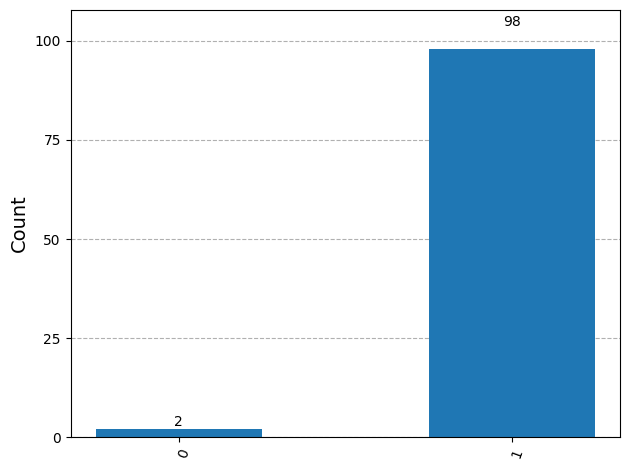

In [10]:
qc = deutsch_algorithm(balanced_x())
qc_transpiled = transpile(qc, backend, optimization_level=2)
qc_job = sampler.run([qc_transpiled], shots=100)
plot_histogram(qc_job.result()[0].data.c.get_counts())

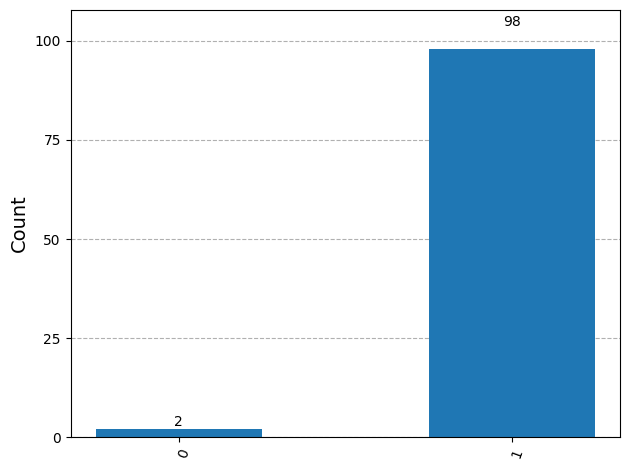

In [11]:
qc = deutsch_algorithm(balanced_not_x())
qc_transpiled = transpile(qc, backend, optimization_level=2)
qc_job = sampler.run([qc_transpiled], shots=100)
plot_histogram(qc_job.result()[0].data.c.get_counts())